In [112]:
import pandas as pd
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [113]:
testsize = 0.2

#load dataset exercise_dataset.csv
df = pd.read_csv('./data/exercise_dataset.csv')
df.head()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825


In [114]:
# create a column named 'category' that should have the values A, B, C or D according to the calories per kg. Each value should represent a quartile with A being the highest and D the lowest quartile
df['category'] = pd.qcut(df['Calories per kg'], 4, labels=['D', 'C', 'B', 'A'])
df.head()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,category
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730,A
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236,D
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,A
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853,C
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825,B


In [115]:
#print the min and max values of each category
print(df.groupby('category')['Calories per kg'].min())
print(df.groupby('category')['Calories per kg'].max())

category
D    0.310067
C    0.885520
B    1.297138
A    1.750730
Name: Calories per kg, dtype: float64
category
D    0.823236
C    1.234853
B    1.647825
A    3.706591
Name: Calories per kg, dtype: float64


### Step 2: Prediction model for user fitness classification

In [116]:
# load dataset bodyPerformance.csv
dfBody = pd.read_csv('./data/bodyPerformance.csv')
dfBody.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [117]:
# encode gender into 0 for M and 1 for F in dfBody

# Define the mapping dictionary
mapping = {'M': 0, 'F': 1}

# Replace values using the mapping dictionary
dfBody['gender'] = dfBody['gender'].replace(mapping)

dfBody.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [118]:
# encode class into 0 for A, 1 for B, 2 for C and 3 for D in dfBody
# Define the mapping dictionary
mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Replace values using the mapping dictionary
dfBody['class'] = dfBody['class'].replace(mapping)

dfBody.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


[0.09239259 0.01669801 0.06613819 0.08494062 0.09845978 0.06009965
 0.06109691 0.08072116 0.19461978 0.15970008 0.08513325]


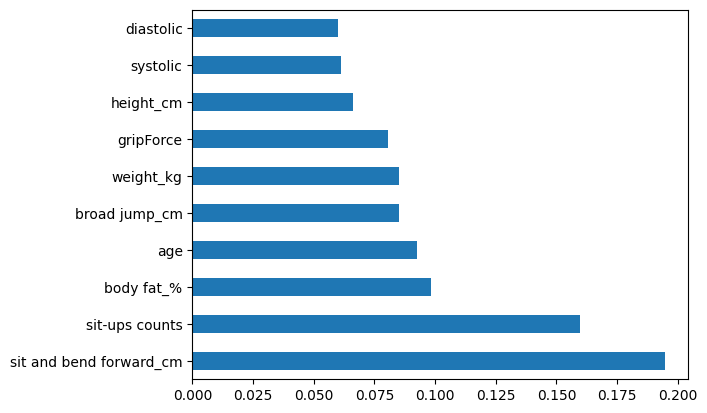

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

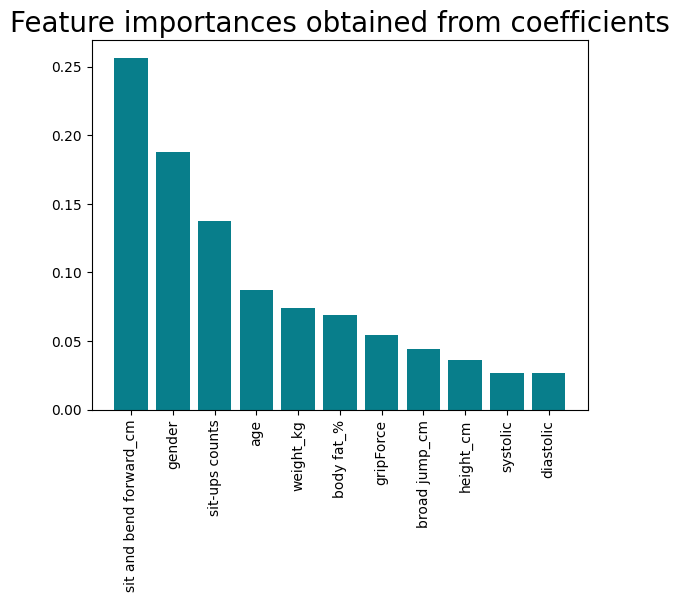

In [120]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [121]:
# drop columns body fat_%	diastolic	systolic	gripForce	sit and bend forward_cm	sit-ups counts	broad jump_cm
#dfBody = dfBody.drop(['body fat_%', 'diastolic', 'systolic', 'sit and bend forward_cm', 'sit-ups counts'], axis=1)
#dfBody.head()

#### Testing Random Forest Classifier

In [122]:
# make a random forest classifier to determine the class of a person based on the features in dfBody



# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(dfBody.drop('class', axis=1), dfBody['class'], test_size=testsize, random_state=42)

# Instantiate a random forests classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit rf to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set accuracy
accuracy = (y_pred == y_test).sum()/len(y_pred)
print('Accuracy of Random Forests classifier: {:.3f}'.format(accuracy))

# make a confusion matrix to see how well the classifier performed

# Print the confusion matrix of the rf model
print(confusion_matrix(y_test, y_pred))

Accuracy of Random Forests classifier: 0.745
[[576 103   5   1]
 [138 406  93  25]
 [ 52 116 446  36]
 [  7  30  77 568]]


#### Testing Decision Tree Classifier

In [123]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(dfBody.drop('class', axis=1), dfBody['class'], test_size=testsize, random_state=42)


# Instantiate a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training set
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree classifier: {:.3f}'.format(accuracy))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Decision Tree classifier: 0.658
[[475 141  54  15]
 [107 365 141  49]
 [ 42 130 379  99]
 [  7  42  90 543]]


#### Testing XGBoost Classifier

In [124]:
#pip install xgboost

In [125]:
# use XGBoost to determine the class of a person based on the features in dfBody


# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(dfBody.drop('class', axis=1), dfBody['class'], test_size=testsize, random_state=42)

# Instantiate a XGBoost classifier with parameters: n_estimators=10 and random_state=42
xg_cl = xgb.XGBClassifier(objective='multi:softprob', n_estimators=10, seed=42)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = accuracy_score(y_test, preds)

print("Accuracy: %f" % (accuracy))

# Print the confusion matrix
print(confusion_matrix(y_test, preds))

Accuracy: 0.724897
[[623  59   2   1]
 [188 378  72  24]
 [ 80 157 389  24]
 [ 19  40  71 552]]


In [126]:
# normalize the features in dfBody and store them in a new dataframe dfBodyNorm

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_std = scaler.fit_transform(dfBody.drop('class', axis=1))

# Create a new DataFrame with the standardized features
dfBodyNorm = pd.DataFrame(X_std, index=dfBody.index, columns=dfBody.drop('class', axis=1).columns)

dfBodyNorm.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,-0.76275,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,-0.76275,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,-0.76275,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,-0.76275,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,-0.76275,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009


In [127]:
# do a logistic regression classification with dfBodyNorm


# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(dfBodyNorm, dfBody['class'], test_size=testsize, random_state=42)

# Instantiate a logistic regression classifier
logreg = LogisticRegression(random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and accuracy score
print(confusion_matrix(y_test, y_pred))

print('Accuracy of logistic regression classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

[[489 184  12   0]
 [140 293 203  26]
 [ 55 132 347 116]
 [ 11  40 100 531]]
Accuracy of logistic regression classifier: 0.620


In [128]:
# do a support vector machine classification with dfBodyNorm


# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(dfBodyNorm, dfBody['class'], test_size=testsize, random_state=42)

# Instantiate a support vector classifier
svc = SVC(random_state=42)

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = svc.predict(X_test)

# Compute and print the confusion matrix and accuracy score
print(confusion_matrix(y_test, y_pred))

print('Accuracy of SVC classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

[[535 147   0   3]
 [144 376 121  21]
 [ 52 139 421  38]
 [  8  40  95 539]]
Accuracy of SVC classifier: 0.698


In [129]:
# fine tune the random forest classifier

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(dfBody.drop('class', axis=1), dfBody['class'], test_size=testsize, random_state=42)

# Instantiate a random forests classifier
rf = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters 'params_rf'
params_rf = {'n_estimators': [100, 350, 500],
                'max_features': ['log2', 'auto', 'sqrt'],
                'min_samples_leaf': [2, 10, 30]}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyerparameters:\n', best_hyperparams)

# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print test set accuracy
print('Accuracy of random forest classifier: {:.3f}'.format(accuracy))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best hyerparameters:
 {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 500}
Accuracy of random forest classifier: 0.752


In [130]:
# save the best model to a file named best_model.pkl

import pickle

# Save the best model to file
pickle.dump(best_model, open('best_model.pkl', 'wb'))

# load the best model from the file best_model.pkl

# Load the best model
best_model = pickle.load(open('best_model.pkl', 'rb'))

# Print its parameters
print("Parameters of the best model: ", best_model.get_params())

# make a prediction with the best model

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set accuracy



Parameters of the best model:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


After finetuning the RF classifier with a grid search, we could slightly improve the performance for our fitness categories classifier to 0.74

# Keyword extraction

In [131]:
dfBody

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [132]:
df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,category
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730,A
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236,D
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,A
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853,C
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825,B
...,...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008,D
244,"Cleaning, dusting",148,176,204,233,0.515199,D
245,Taking out trash,177,211,245,279,0.617427,D
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236,D


In [133]:
sources = pd.read_csv('./data/data.csv')

# give every unique Exercise an id and store it in a new column 'exercise_id'
sources['exercise_id'] = sources['Exercise'].factorize()[0]
sources['Exercise'].unique()

array(['Walking', 'Elliptical machine', 'StairMaster', 'Dancing',
       'Swimming', 'Cycling', 'Playing Sports',
       'High-intensity interval training', 'Knee-to-chest stretch',
       'Lower back rotational stretch', 'Lower back flexibility exercise',
       'Bridge exercise', 'Cat stretch',
       'Seated lower back rotational stretch', 'Chin tuck',
       'Side rotation', 'Side bending stretch', 'Levator scapula stretch',
       'Shoulder circles', 'Front stretch', 'Shoulder blade squeezes',
       'Nodding', 'Swimming and water aerobics', 'Leg lifts', 'Squats',
       'Jogging', 'Mountain climbing', 'Power walking',
       'Warm-water exercise', 'Yoga', 'Qigong (like Tai chi)', 'Pilates',
       'Aerobic Exercise', 'Resistance Exercise',
       'Floor-based strength exercises', 'Weight training',
       'Interval training', 'Gardening', 'Strength training',
       'Exercises that put joints through their full range of motion',
       'Strengthening exercises', 'Aerobic exercise

In [134]:
# Check if sources['Exercise'] is in any df['Activity, Exercise or Sport (1 hour)']. If so store the corresponding sources['exercise_id'] in df['exercise_id'] else store -1
for index, row in sources.iterrows():
    exercise = row['Exercise']
    exercise_id = row['exercise_id']
    exercise_lower = exercise.lower()
    
    # Check if exercise name is contained in any activity name in 'df'
    matching_activities = df[df['Activity, Exercise or Sport (1 hour)'].str.lower().str.contains(exercise_lower)]
    
    if len(matching_activities) > 0:
        # If a match is found, store the exercise_id in 'df'
        df.loc[matching_activities.index, 'exercise_id'] = exercise_id

# Store -1 in 'exercise_id' column for exercises with no match
df['exercise_id'].fillna(-1, inplace=True)
df

C:\Users\riede\AppData\Local\Temp\ipykernel_29364\3241144885.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_activities = df[df['Activity, Exercise or Sport (1 hour)'].str.lower().str.contains(exercise_lower)]


,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,category,exercise_id
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730,A,5.0
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236,D,5.0
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,A,5.0
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853,C,5.0
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825,B,5.0
...,...,...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008,D,-1.0
244,"Cleaning, dusting",148,176,204,233,0.515199,D,-1.0
245,Taking out trash,177,211,245,279,0.617427,D,-1.0
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236,D,0.0


In [135]:
# output all unique values of 'exercise_id' in df
df['exercise_id'].unique()

array([ 5., -1., 47., 29., 43.,  3., 46.,  0., 26.,  4., 25., 37.])

In [136]:
# save df to a new csv file
df.to_csv('./data/exercise_dataset_with_exercise_id.csv', index=False)

In [137]:
# save sources to a new csv file
sources.to_csv('./data/sources_with_exercise_id.csv', index=False)